In [232]:
import warnings
# 불필요한 경고 출력을 방지합니다.
warnings.filterwarnings('ignore')

In [233]:
import pandas as pd

## 실습에 주로 활용할 데이터 셋

[sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

`sklearn.dataset`에서 제공해주는 다양한 샘플 데이터를 활용합니다.

### iris 데이터셋

꽃 종류 분류하기

[iris 데이터셋](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [234]:
from sklearn.datasets import load_iris

In [235]:
# iris 데이터셋을 로드합니다. dict형태로 들어가있음
iris = load_iris()

* `DESCR`: 데이터셋의 정보를 보여줍니다.
* `data`: feature data.
* `feature_names`: feature data의 컬럼 이름
* `target`: label data (수치형)
* `target_names`: label의 이름 (문자형)

In [236]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [237]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [238]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* **sepal**: 꽃 받침
* **petal**: 꽃잎

In [239]:
# feautre에 따라 꽃의 종류(target)을 분류

target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [240]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 데이터프레임 만들기

In [241]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [242]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [243]:
df_iris['target'] = target

In [244]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 시각화

In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

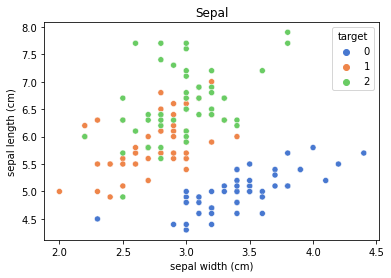

In [246]:
sns.scatterplot('sepal width (cm)','sepal length (cm)', hue='target', palette='muted',data=df_iris)
plt.title('Sepal')
plt.show()

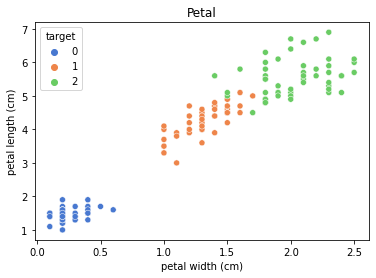

In [247]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Petal')
plt.show()
#Petal이 좀 더 명확하게 class구분이 된다

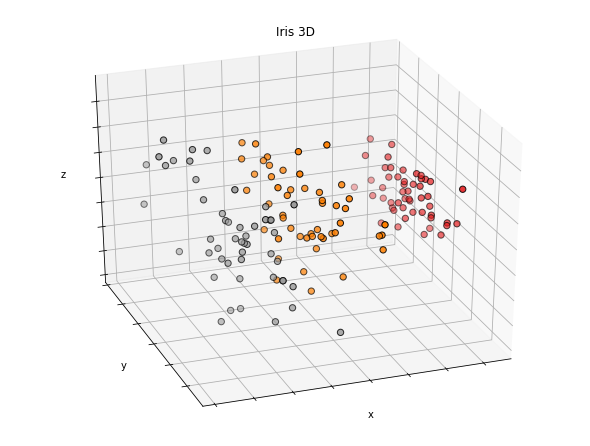

In [248]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA  # PCA : 4가지 변수=4차원이고, 이를 3차원으로 줄여주는 역할

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'],
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [249]:
# train, valid로 나눠주기
from sklearn.model_selection import train_test_split

In [250]:
# train으로 모델 학습, valid로 모델 적합도 확인
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])

In [251]:
# 잘 들어갔는지 확인해보기 (112개씩)
x_train.shape, y_train.shape

((112, 4), (112,))

In [252]:
# 잘 들어갔는지 확인해보기 (38개씩)
x_valid.shape, y_valid.shape

((38, 4), (38,))

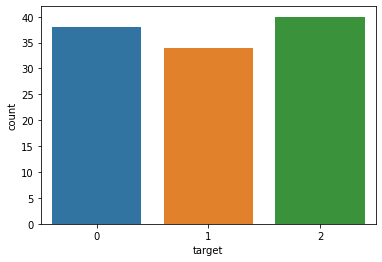

In [253]:
sns.countplot(y_train)
# y train이 지금 균등하게 보임 : 단, 아닐때도 있음

stratify: label의 클래스의 분포를 균등하게 배분

In [254]:
 # target 클래스를 균등하게 부여해줌
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])

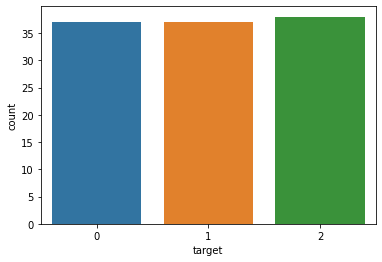

In [255]:
sns.countplot(y_train)

In [256]:
# 다시 한 번, 분배 잘 됐나 확인
x_train.shape, y_train.shape

((112, 4), (112,))

In [257]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

### Logistic Regression

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression)

* 로지스틱 회귀(영어: logistic regression)는 영국의 통계학자인 D. R. Cox가 1958년에 제안한 확률 모델
* 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법

LogisticRegression, 서포트 벡터 머신 (SVM) 과 같은 알고리즘은 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

하지만, 3개 이상의 클래스에 대한 판별을 진행하는 경우, 다음과 같은 전략으로 판별하게 됩니다.

**one-vs-rest (OvR)**: K 개의 클래스가 존재할 때, 1개의 클래스를 제외한 다른 클래스를 K개 만들어, 각각의 이진 분류에 대한 확률을 구하고, 총합을 통해 최종 클래스를 판별

**one-vs-one (OvO)**: 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때, 0vs1, 0vs2, 0vs3, ... , 2vs3 까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별

대부분 **OvsR 전략을 선호**합니다.

In [258]:
from sklearn.linear_model import LogisticRegression

**step 1: 모델 선언**

In [259]:
model = LogisticRegression()

**step 2: 모델 학습**

In [260]:
model.fit(x_train, y_train)
# 다양한 세팅할 수 있는 값들이 있음을 알 수 있다

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**step 3: 예측**

In [261]:
# 학습하지 않은 데이터를 예측해보기
prediction = model.predict(x_valid)

In [262]:
prediction[:5]

array([2, 2, 2, 2, 1])

**step 4: 평가**

In [263]:
# 해당 예측값이 정확한지 확인이 필요하다 : 1에 가까울수록 확률이 높음
(prediction == y_valid).mean()
# stratify 모델을 사용하지 않은 경우 모델에 대한 예측 정확도가 달라진다 => 클래스를 균등하게 분배하는게 좋은 결과를 얻는데 중요하다

0.9473684210526315

### SGDClassifier

**stochastic gradient descent (SGD)**: 확률적 경사 하강법

In [264]:
from IPython.display import Image

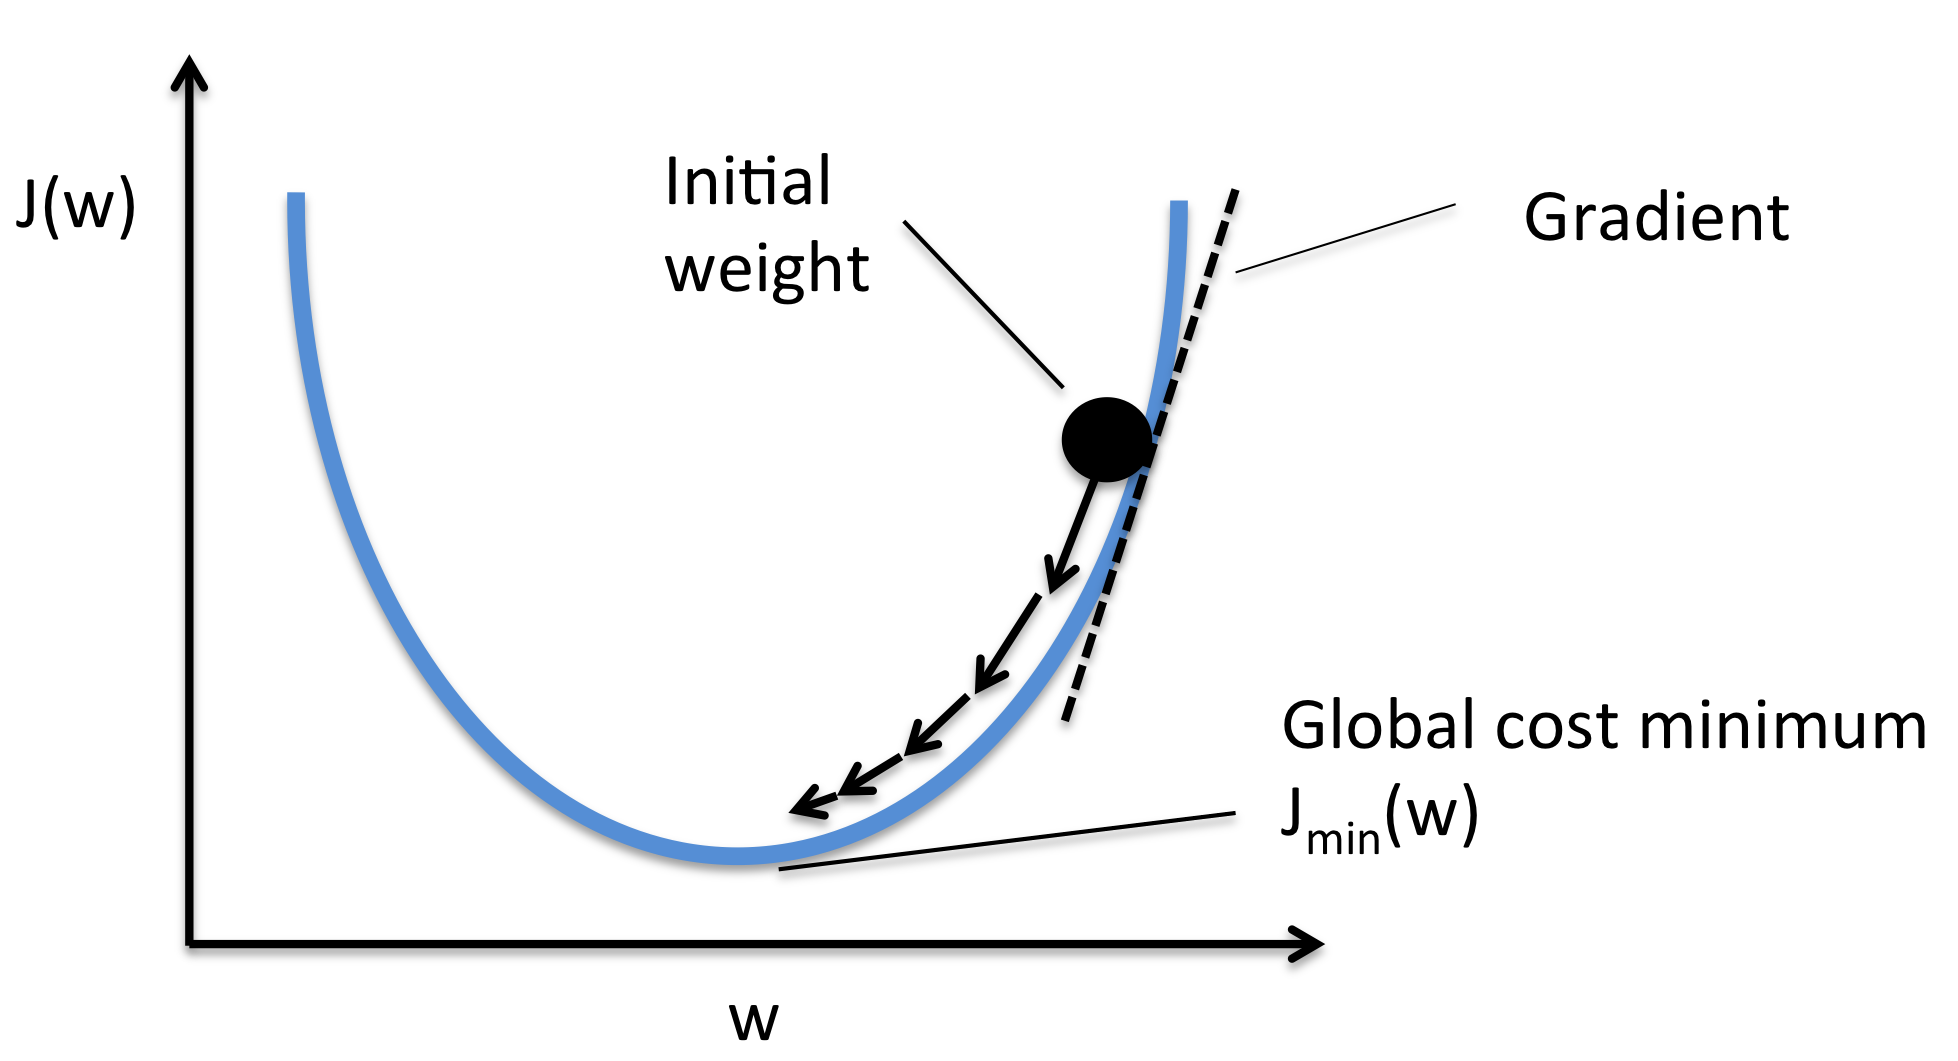

In [265]:
# 출처: https://machinelearningnotepad.wordpress.com/
Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=500)

[sklearn 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [266]:
from sklearn.linear_model import SGDClassifier

**step 1: 모델 선언**

In [284]:
sgd = SGDClassifier(random_state=0)

**step 2: 모델 학습**

In [285]:
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**step 3: 예측**

In [286]:
prediction = sgd.predict(x_valid)

In [287]:
prediction

array([0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0])

In [288]:
# 위에 로지스틱이랑은 또 다른 결과(성능이 좀 떨어지는 것으로 보임)
(prediction == y_valid).mean()

0.6842105263157895

### 하이퍼 파라미터 (hyper-parameter) 튜닝

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

각 알고리즘 별, hyper-parameter의 종류가 다양합니다.

모두 다 외워서 할 수는 없습니다! 문서를 보고 적절한 가설을 세운 다음 적용하면서 검증해야합니다.

(나중에는 이 또한 자동으로 할 수 있습니다)

* random_state: 하이퍼 파라미터 튜닝시, 고정할 것
* n_jobs=-1: CPU를 모두 사용 (학습속도가 빠름)

In [275]:
# train 할때 작용하는 여러 요소들(하이퍼파라미터) 조절해보기
sgd = SGDClassifier(penalty='l1', random_state=0, n_jobs=-1)

In [276]:
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [277]:
prediction = sgd.predict(x_valid)

In [278]:
# penalty를 l1으로 조절해줘서 위에서 ramdom_state=0으로만 실행한것보다 좀 더 향상된 결과가 나옴
(prediction == y_valid).mean()

0.8947368421052632

### KNeighborsClassifier

최근접 이웃 알고리즘

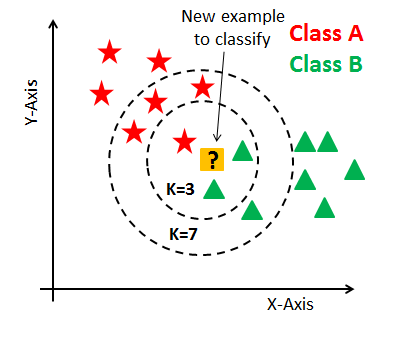

In [ ]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [289]:
# K=3 일 때, ? 주변에 B가 많으므로 ?는 B로 예측
# K=7 일 때, ? 주변에 B가 많으므로 ?는 A로 예측
# => K를 어떻게 선언하는지에 따라 결과가 다름

In [290]:
from sklearn.neighbors import KNeighborsClassifier

In [291]:
knc = KNeighborsClassifier()

In [292]:
knc.fit(x_train, y_train)
# 일반적으로 neighbor은 홀수로 들어감 (대소를 구분하기위해)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [294]:
knc_pred = knc.predict(x_valid)

In [295]:
(knc_pred == y_valid).mean()

0.9210526315789473

In [304]:
# K값을 9로 바꿔보자
knc = KNeighborsClassifier(n_neighbors=7)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)

In [305]:
# 성능이 변한다, 이것저것 해보기
(knc_pred == y_valid).mean()

0.9736842105263158

### 서포트 벡터 머신 (SVC)

* 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만듦.
* 경계로 표현되는 데이터들 중 가장 큰 폭을 가진 경계를 찾는 알고리즘.

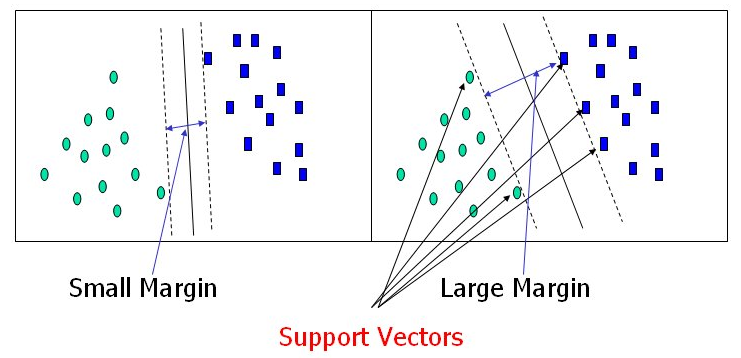

In [306]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

LogisticRegression과 같이 이진 분류만 가능합니다. (2개의 클래스 판별만 가능합니다.)

- OvsR 전략 사용

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [307]:
from sklearn.svm import SVC

In [309]:
svc = SVC(random_state=0)  # 모델선언
svc.fit(x_train, y_train)   # 학습
svc_pred = svc.predict(x_valid)  # 예측-> 이후 정확도 비교

# 이런 과정에 익숙해지자

In [310]:
svc

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [312]:
(svc_pred == y_valid).mean() # 모델 정확도 비교

0.9473684210526315

In [313]:
svc_pred[:5]

array([2, 2, 2, 2, 1])

각 클래스 별 확률값을 return 해주는 `decision_function()`

In [314]:
svc.decision_function(x_valid)[:5]
# 첫번재 행을 보면 2번쪽에 제일 높은 수가 나와서 2로 나옴, 두번째~네번째도 2, 마지막은 1번열쪽에 값이 제일 크므로 1

array([[-0.23389529,  1.18765845,  2.17183233],
       [-0.21342576,  0.81144213,  2.25168071],
       [-0.22864452,  0.89126345,  2.24246177],
       [-0.23577587,  0.97087728,  2.23843476],
       [-0.22318946,  2.21051231,  1.07933968]])

### 의사 결정 나무 (Decision Tree)

스무고개처럼, 나무 가지치기를 통해 소그룹으로 나누어 판별하는 것

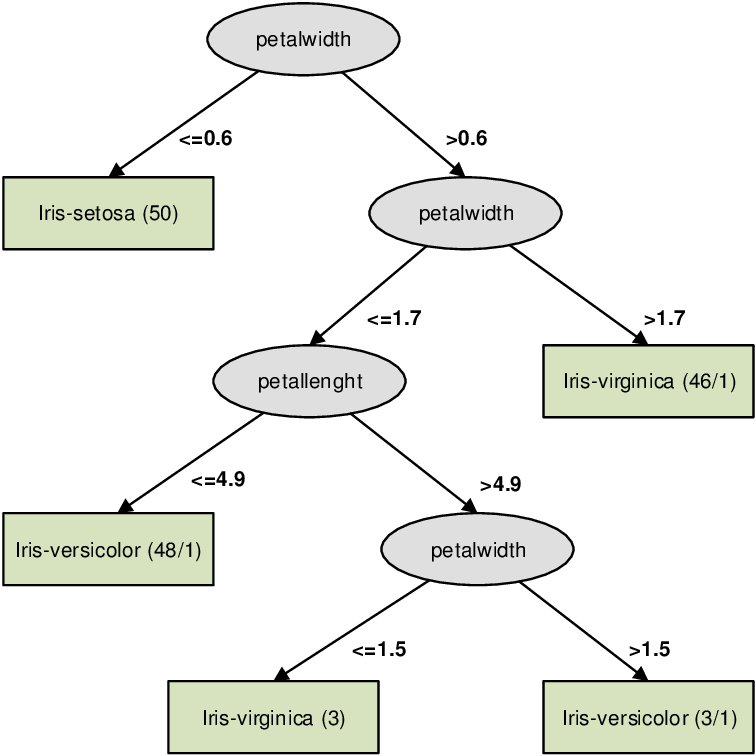

In [ ]:
Image('https://www.researchgate.net/profile/Ludmila_Aleksejeva/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=500)

[도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

In [320]:
from sklearn.tree import DecisionTreeClassifier

In [321]:
dtc = DecisionTreeClassifier(random_state=0)

In [322]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [323]:
dtc_pred = dtc.predict(x_valid)

In [324]:
(dtc_pred == y_valid).mean()

0.9473684210526315

In [325]:
from sklearn.tree import export_graphviz
from subprocess import call

In [326]:
def graph_tree(model):
    # .dot 파일로 export 해줍니다
    export_graphviz(model, out_file='tree.dot')

    # 생성된 .dot 파일을 .png로 변환
    
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png 출력
    return Image(filename = 'decistion-tree.png', width=500)

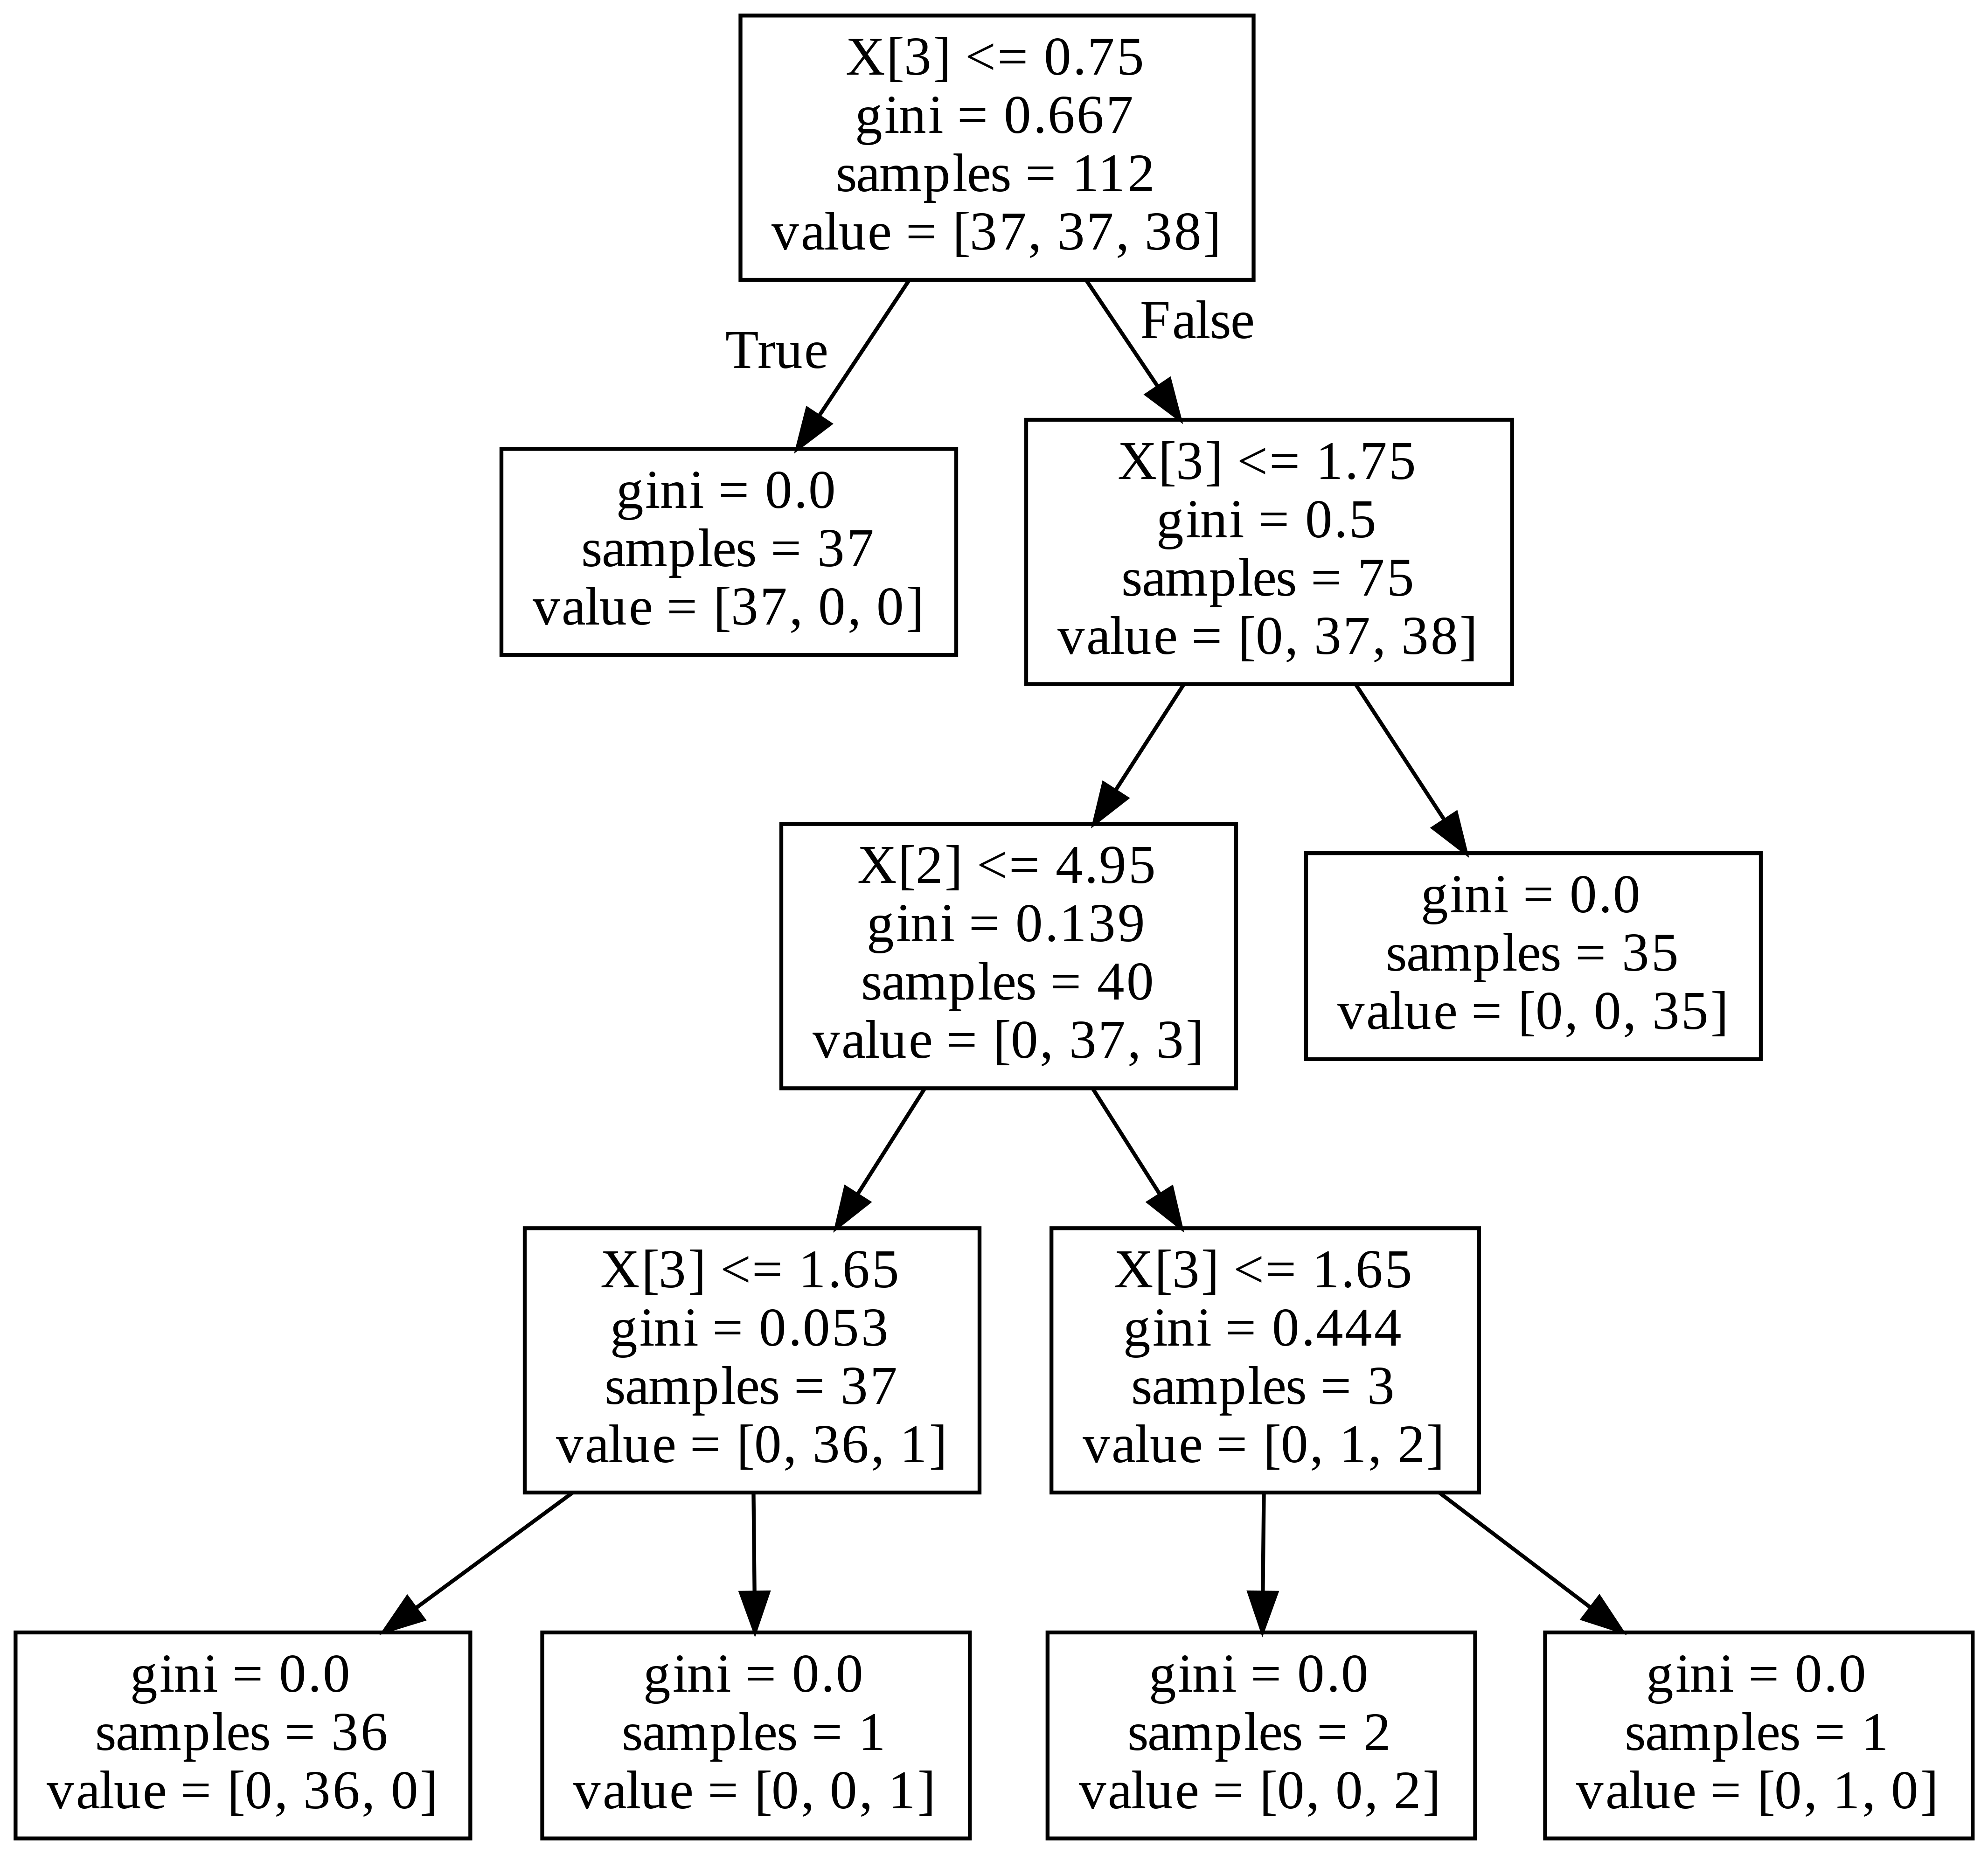

In [327]:
graph_tree(dtc)

gini계수: 불순도를 의미하며, 계수가 높을 수록 엔트로피가 크다는 의미하며

엔트로피가 크다는 의미는 쉽게 말해서, 클래스가 혼잡하게 섞여 있다는 뜻입니다.

In [328]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

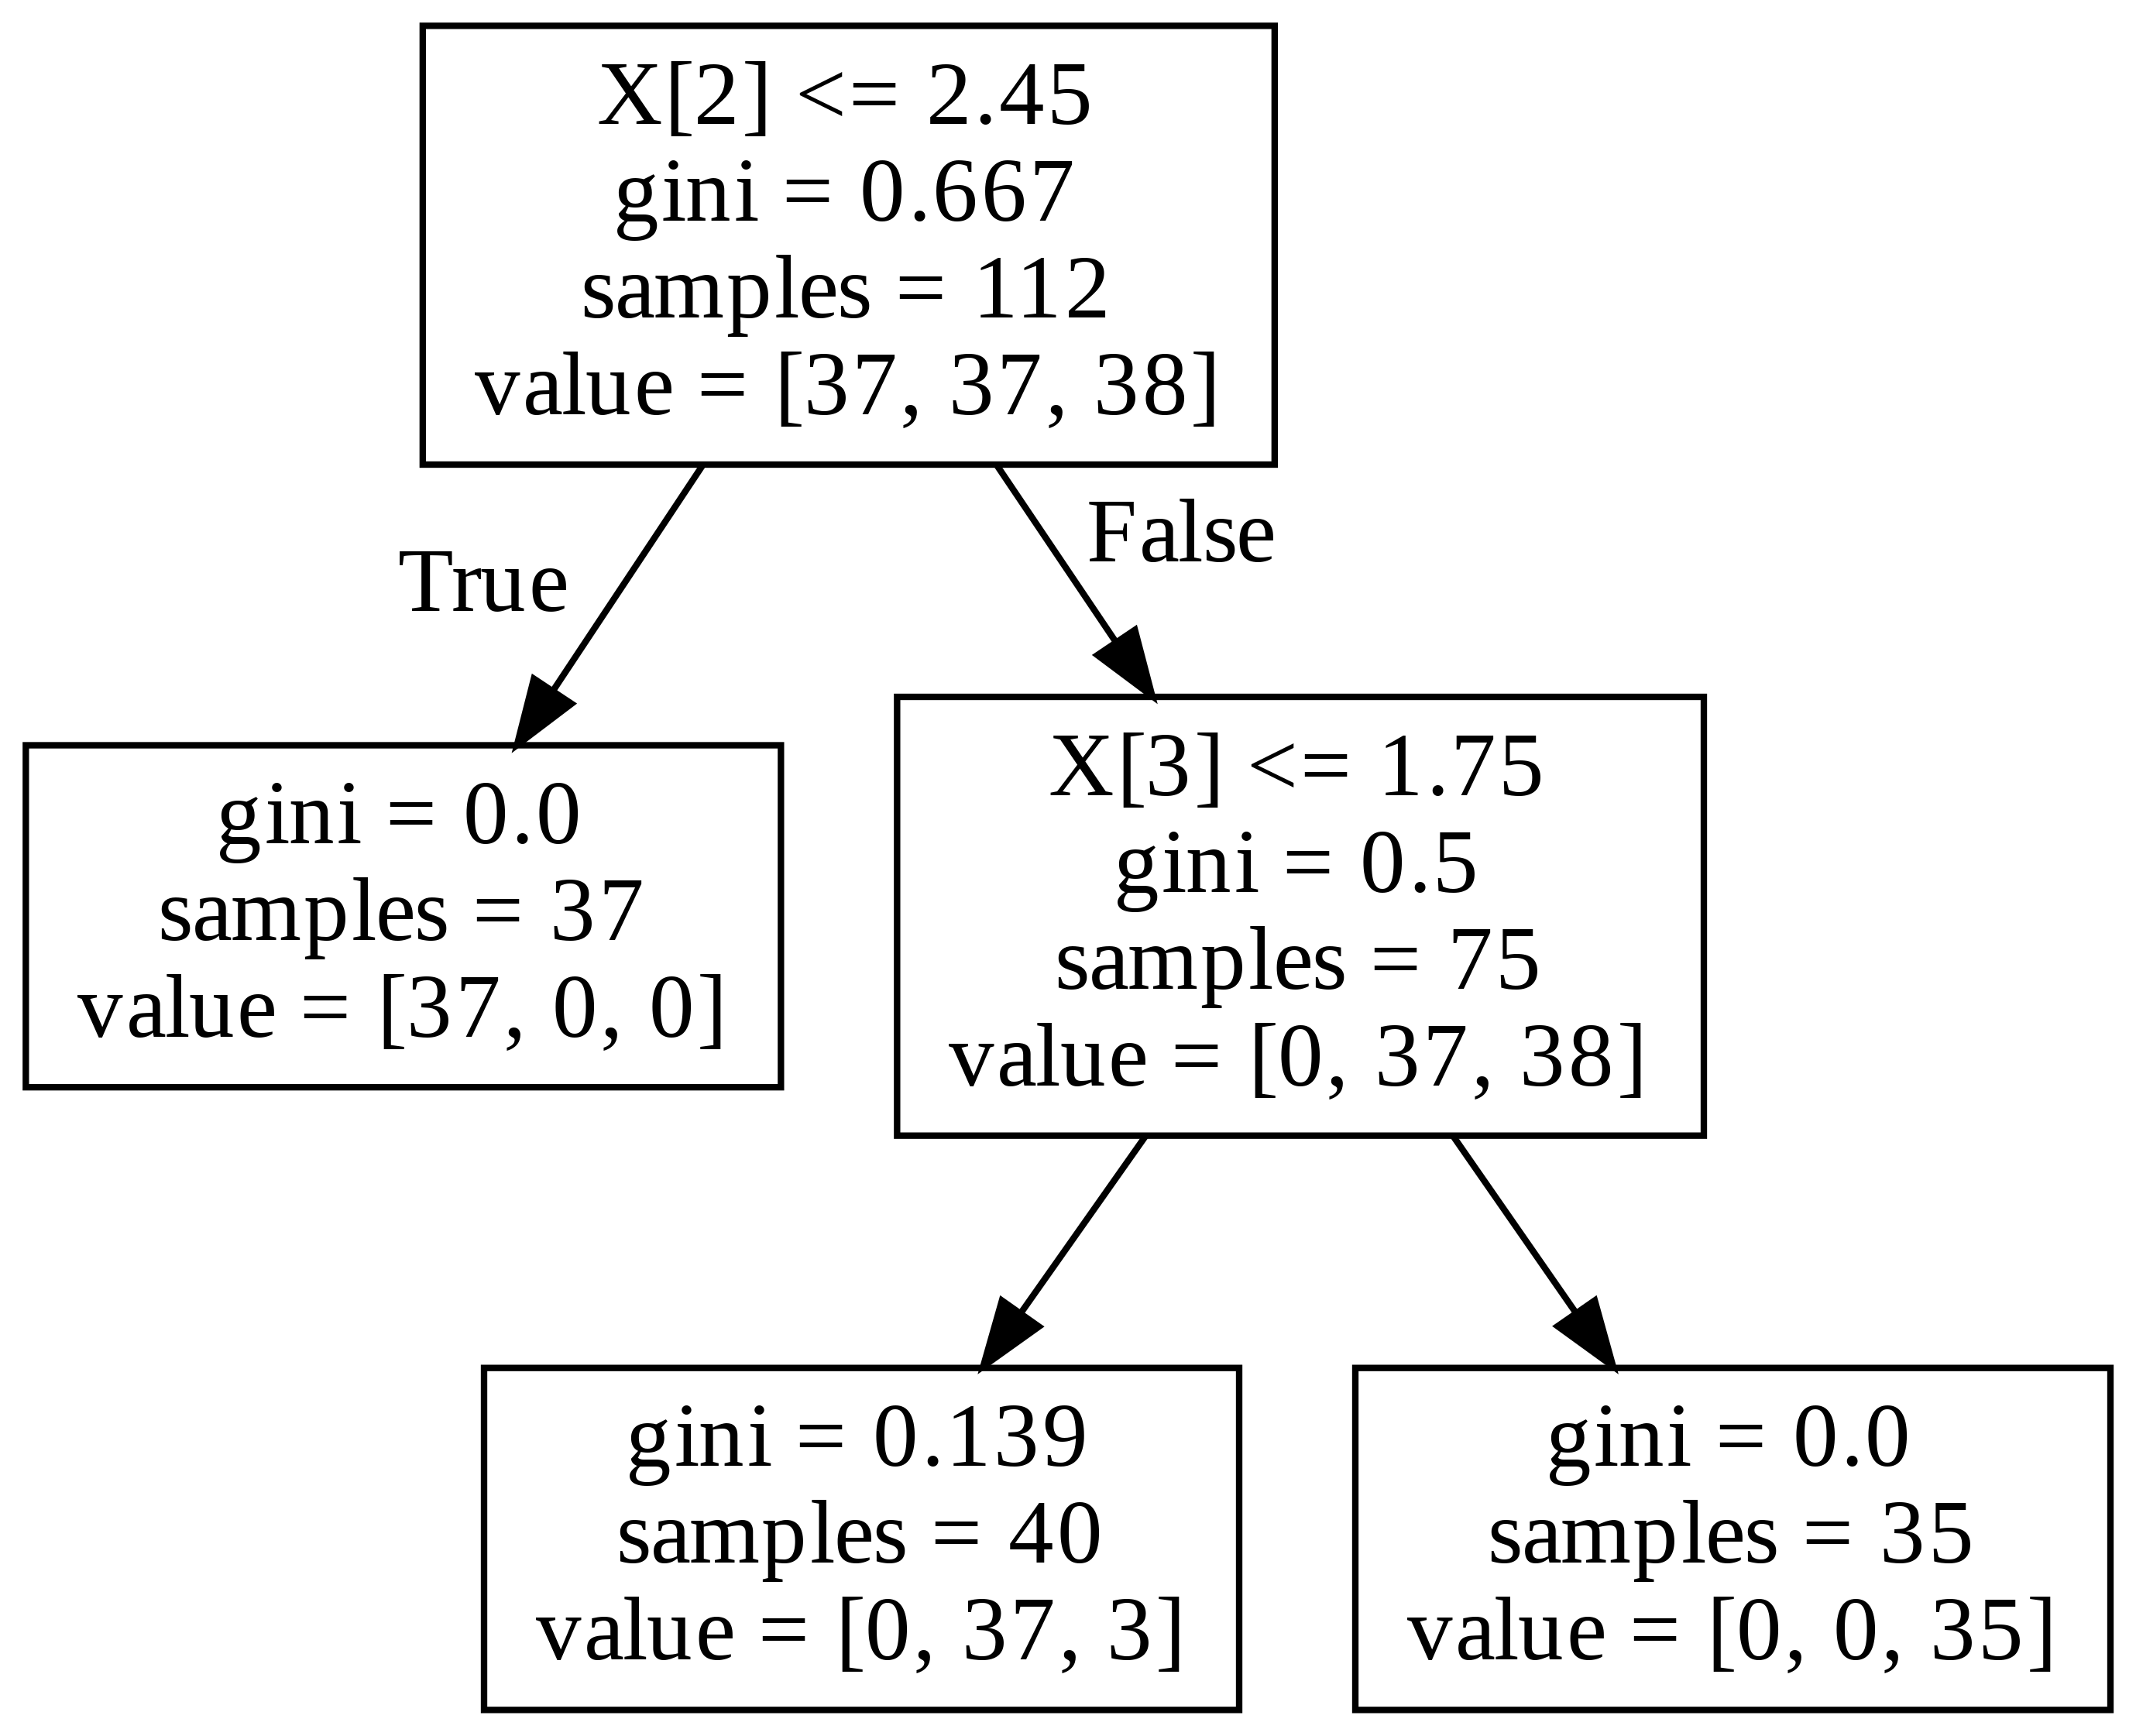

In [329]:
graph_tree(dtc)

## 오차 (Error)

### 정확도의 함정

In [330]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np

유방암 환자 데이터셋을 로드합니다.

**target**: 0: 악성종양, 1:양성종양

In [331]:
cancer = load_breast_cancer()

In [332]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [333]:
data = cancer['data']
target = cancer['target']
feature_names=cancer['feature_names']

데이터 프레임을 생성합니다.

In [334]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = cancer['target']

In [335]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


target 0 : 악성, 1: 양성

In [336]:
pos = df.loc[df['target']==1]
neg = df.loc[df['target']==0]

In [337]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,0.3141,3.8960,2.041,22.810,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


양성 환자 **357개** + 악성 환자 **5개**

In [ ]:
# 새로운 샘플 만들기
sample = pd.concat([pos, neg[:5]], sort=True)

In [338]:
# 실습, 테스트 구분
# 클래스 균등하게 분배해주는 stratify 옵션 일단 사용 안해보고 테스트
x_train, x_test, y_train, y_test = train_test_split(sample.drop('target', 1), sample['target'], random_state=42)

모델을 정의하고, 학습합니다.

In [339]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [340]:
(pred == y_test).mean() # 예측값이 괜찮게 나옴

0.978021978021978

In [343]:
# 무조건 양성이라고 설정하고 결과를 보면
my_prediction = np.ones(shape=y_test.shape)

In [342]:
# 오히려 높게 나옴
(my_prediction == y_test).mean()
# 일단 양성이라고 판단해도 98%로 양성이니까~ 라고 생각 할 수 있음

0.989010989010989

정확도만 놓고 본다면, 제가 만든 무조건 음성 환자로 예측하는 분류기가 성능이 좋습니다

하지만, 의사가 과연 **무조건 음성 환자로 예측해서 예측율 98.9% 로 말하는 의사**는 자질이 좋은 의사일까요?

정확도(accuracy)만 보고 분류기의 성능을 판별하는 것은 **위와 같은 오류**에 빠질 수 있습니다.

이를 보완하고 생겨난 지표들이 있습니다. 차차 알아보겠습니다.

### 오차 행렬 (confusion maxtix)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,pred)

array([[ 1,  0],
       [ 2, 88]])

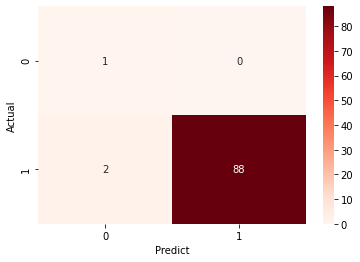

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Reds')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

In [ ]:
# 1으로 예측하고 1으로 값이 나온경우 : 88개 True positive
# 0으로 예측하고 0으로 값이 나온경우 : 1개  True negative
# FN, FP도 확인
# 이 4가지를 통해 정밀도를 확인 -> 이걸 가지고 f1 score확인

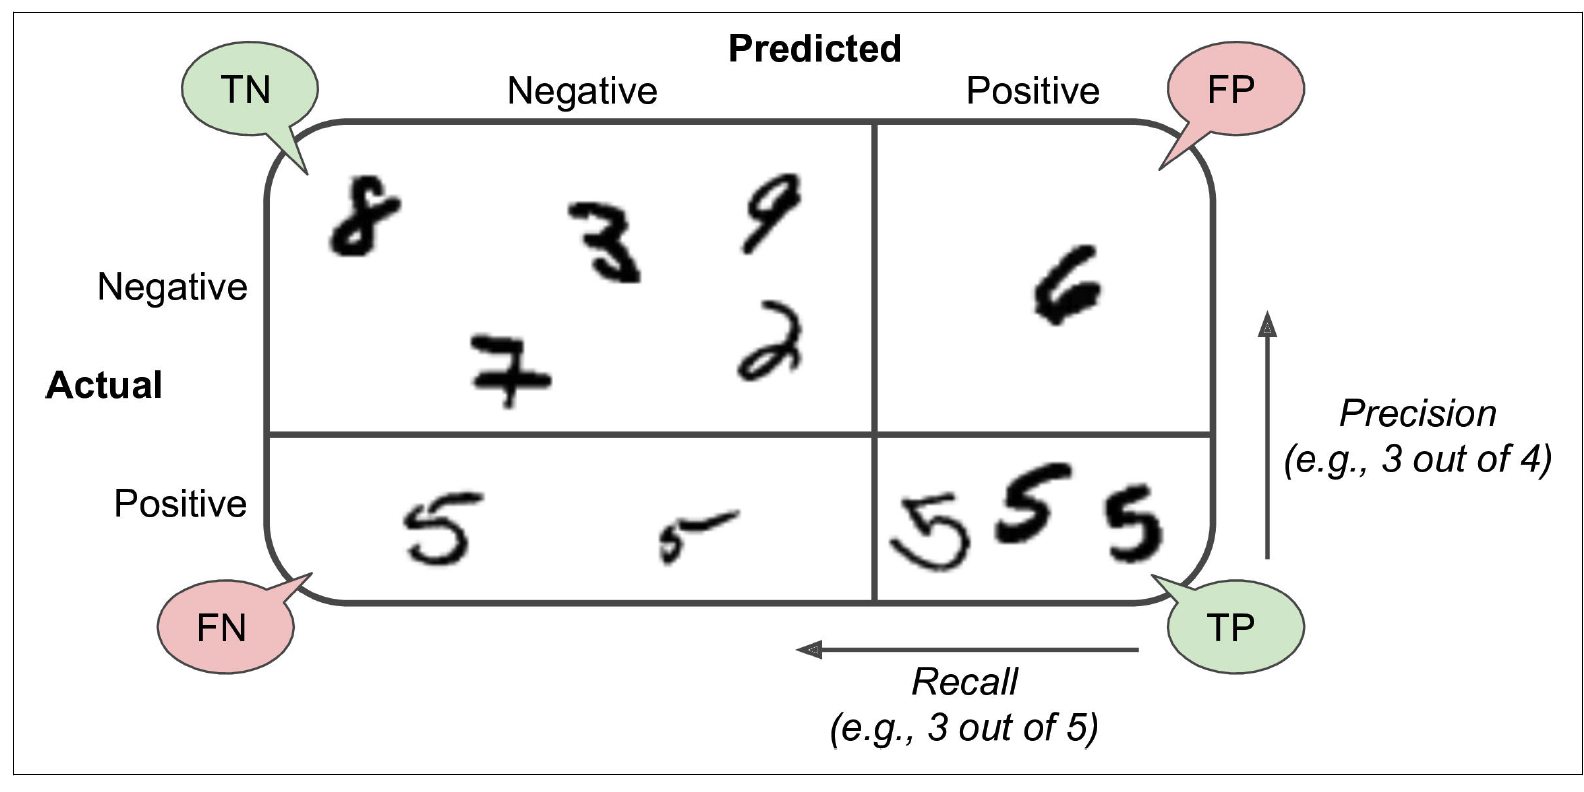

In [ ]:
# 출처: https://dojinkimm.github.io
Image('https://dojinkimm.github.io/assets/imgs/ml/handson_3_1.png', width=500)

In [ ]:
from sklearn.metrics import precision_score, recall_score

### 정밀도 (precision)

양성 예측 정확도

TP / (TP + FP)

In [344]:
precision_sc ore(y_test,pred)

1.0

무조건 **양성**으로 판단하면 좋은 정밀도를 얻기 때문에 유용하지 않습니다.

### 재현율 (recall)

TP / (TP + FN)

정확하게 감지한 **양성 샘플의 비율**입니다.

민감도 (sensitivity) 혹은 True Positive Rate (TPR)이라고도 불리웁니다.

In [ ]:
recall_score(y_test,pred)

0.9777777777777777

In [ ]:
88/90

0.9777777777777777

### f1 score

정밀도와 재현율의 **조화 평균**을 나타내는 지표입니다.

In [ ]:
Image('https://miro.medium.com/max/918/1*jCu9fNZS0hSRHVJ2cBTegg.png')

<IPython.core.display.Image object>

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$



In [ ]:
from sklearn.metrics import f1_score

In [345]:
f1_score(y_test, pred)
# 실제 모델을 실생활에 적용할 때 더 효율적임, 정확도의 함정에 빠지지않게 도와준다

0.9887640449438202